In [1]:
import pandas as pd
from sklearn.cluster import SpectralClustering
import numpy as np

In [2]:
GloVe_df = pd.read_csv("GloVe.csv")
Comm_df = pd.read_csv("HN_community - Copy.csv")
GloVe_df = GloVe_df.query("hate != 'other'")
Users_df = pd.merge(GloVe_df, Comm_df, on = "user_id", how = "inner") 

In [3]:
community = [1227,775,1340,188,1351,613,1739,1459,1242,1709]
Users_df['Community Labels'] = Users_df['modularity_class'].apply(lambda x: 0 if x not in community else x)
print(Users_df['modularity_class'].value_counts(sort=True).nlargest(11))
print(Users_df['Community Labels'].value_counts(sort=True).nlargest(11))

1227    532
775     351
1340    349
188     343
1351    278
613     183
1739    139
0       125
1459     94
1242     78
1709     75
Name: modularity_class, dtype: int64
0       2334
1227     532
775      351
1340     349
188      343
1351     278
613      183
1739     139
1459      94
1242      78
1709      75
Name: Community Labels, dtype: int64


In [7]:
G = Users_df[Users_df['Community Labels']!=0]
G

,user_id,hate,0_glove,1_glove,2_glove,3_glove,4_glove,5_glove,6_glove,7_glove,...,292_glove,293_glove,294_glove,295_glove,296_glove,297_glove,298_glove,299_glove,modularity_class,Community Labels
0,0,normal,-0.071806,0.106978,-0.176602,-0.055014,0.080056,-0.039964,0.024863,-0.087665,...,-0.061740,-0.108736,0.095297,0.014048,-0.079171,-0.064034,0.039573,0.121562,775,775
2,29,normal,-0.000290,0.155743,-0.145234,-0.032391,0.079793,-0.062642,0.006700,-0.088104,...,-0.006155,-0.123751,0.071145,-0.017247,-0.047502,-0.052196,0.063975,0.077203,1227,1227
3,44,normal,-0.050305,0.135728,0.004811,0.019043,0.103328,-0.003071,0.040860,-0.065425,...,-0.014020,-0.067463,0.037895,-0.023044,-0.039938,-0.008573,-0.041248,0.104091,1459,1459
4,85,normal,-0.045040,0.118044,-0.104646,0.003051,0.065017,-0.059987,0.013595,-0.065294,...,-0.019570,-0.077693,0.085892,-0.044486,-0.062787,-0.040975,0.000062,0.100986,1351,1351
5,99,normal,-0.077922,0.132027,-0.129249,-0.017483,0.068316,-0.074028,0.004978,-0.058020,...,-0.025030,-0.096847,0.078448,-0.001755,-0.072778,-0.077154,0.041489,0.092269,188,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,100111,normal,-0.049500,0.134000,-0.188658,-0.068154,0.083773,-0.008827,0.050329,-0.186989,...,-0.078886,-0.126030,0.157653,-0.031329,-0.053771,-0.023439,0.050491,0.145388,1227,1227
4748,100155,normal,-0.079384,0.111048,-0.095504,0.007517,0.052760,-0.058986,0.003828,-0.067439,...,-0.035854,-0.085969,0.088257,-0.019889,-0.037317,-0.034041,0.008198,0.086986,188,188
4749,100190,hateful,-0.054244,0.091990,-0.036785,0.023627,0.081854,-0.050964,0.017710,-0.029712,...,-0.042763,-0.061507,0.092903,0.020164,-0.036712,-0.047412,-0.006263,0.087388,775,775
4751,100312,normal,-0.053159,0.137918,-0.164817,-0.012606,0.078891,-0.037922,0.010169,-0.119235,...,-0.036603,-0.075109,0.105719,-0.017057,-0.052708,-0.056457,0.039386,0.101596,1340,1340


In [9]:
GloVe = G[G.columns[2:-2]].to_numpy()
#GloVe = GloVe[GloVe.columns[2:-2]].to_numpy()
GloVe.shape

(2422, 300)

In [19]:
%%time
clustering = SpectralClustering(n_clusters=11,
        assign_labels="discretize",
        random_state=0).fit(GloVe)
G['spectral'] = clustering.labels_

Wall time: 3.14 s


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
%%time
normalizeGloVe = GloVe / np.linalg.norm(GloVe)

Wall time: 2.99 ms


In [21]:
%%time
clustering = SpectralClustering(n_clusters=10,
        assign_labels="discretize",
        random_state=0).fit(normalizeGloVe)
G['normal_spectral'] = clustering.labels_

Wall time: 2.87 s


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'Community member count')

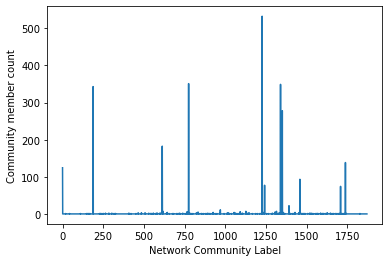

In [16]:
ax = Users_df['modularity_class'].value_counts(sort=True).sort_index().plot()

# Set the x-axis label
ax.set_xlabel("Network Community Label")

# Set the y-axis label
ax.set_ylabel("Community member count")

7     1995
1      379
0       33
4        4
6        4
3        3
2        2
10       2
Name: spectral, dtype: int64


<AxesSubplot:>

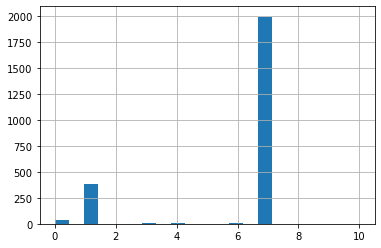

In [22]:
print(G['spectral'].value_counts(sort=True))
#Users_df['spectral'].value_counts(sort=True).sort_index().plot()
G['spectral'].hist(bins=21)

<AxesSubplot:>

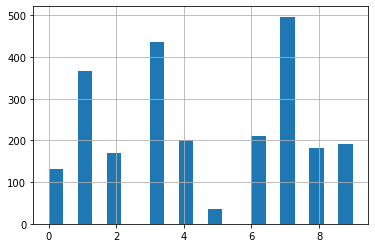

In [23]:
#Users_df['normal_spectral'].value_counts(sort=True)
G['normal_spectral'].hist(bins=21)

In [24]:
G['modularity_class'].value_counts(sort=True).nlargest(11)
#community = [1227,775,1340,188,1351,613,1739,0,1459,1242,1709]

1227    532
775     351
1340    349
188     343
1351    278
613     183
1739    139
1459     94
1242     78
1709     75
Name: modularity_class, dtype: int64

In [25]:
pd.crosstab(G['Community Labels'], G['normal_spectral'],margins=True)

normal_spectral,0,1,2,3,4,5,6,7,8,9,All
Community Labels,,,,,,,,,,,
188,10,147,12,48,66,1,15,3,17,24,343
613,0,5,13,78,10,4,16,56,1,0,183
775,5,57,8,234,24,2,6,11,2,2,351
1227,9,9,26,12,34,6,86,340,8,2,532
1242,1,31,4,9,4,0,7,4,10,8,78
1340,3,73,49,22,34,6,45,49,56,12,349
1351,21,19,16,15,6,14,4,4,50,129,278
1459,82,1,0,1,1,0,1,0,1,7,94
1709,0,15,8,0,13,0,13,26,0,0,75


In [14]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab( G['normal_spectral'],G['Community Labels']))[0:3]

(4751.389114980436, 0.0, 100)

In [26]:
import seaborn as sns
orange = sns.light_palette("orange", as_cmap=True)
pd.crosstab(G['Community Labels'],G['normal_spectral']).style.background_gradient(cmap=orange)

normal_spectral,0,1,2,3,4,5,6,7,8,9
Community Labels,,,,,,,,,,
188,10,147,12,48,66,1,15,3,17,24
613,0,5,13,78,10,4,16,56,1,0
775,5,57,8,234,24,2,6,11,2,2
1227,9,9,26,12,34,6,86,340,8,2
1242,1,31,4,9,4,0,7,4,10,8
1340,3,73,49,22,34,6,45,49,56,12
1351,21,19,16,15,6,14,4,4,50,129
1459,82,1,0,1,1,0,1,0,1,7
1709,0,15,8,0,13,0,13,26,0,0


In [72]:
pd.crosstab(Users_df['Community Labels'],Users_df['normal_spectral']).style.background_gradient(cmap=orange).to_excel("aaaa.xlsx")

In [16]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

In [18]:
def k_distances2(x, k):
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm

In [19]:
%%time
g, g2= k_distances2(normalizeGloVe, 300)

Wall time: 11.7 s


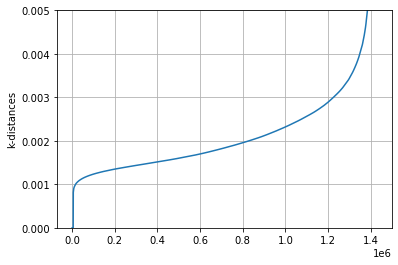

Wall time: 277 ms


In [21]:
%%time
plt.plot(g2)
plt.ylabel("k-distances")
plt.grid(True)
#plt.xlim([0, 40000])
plt.ylim([0, 0.005])
plt.show()

In [22]:
%%time
epsilon = 0.002
minimumSamples = 300
db = DBSCAN(eps=epsilon, min_samples=minimumSamples, algorithm='ball_tree').fit(normalizeGloVe)
labels = db.labels_
print(set(labels))
Users_df['cluster_groups']=labels
Users_df['cluster_groups'].value_counts()

{0, -1}
Wall time: 7.43 s


 0    3466
-1    1290
Name: cluster_groups, dtype: int64

In [28]:
chi2_contingency(pd.crosstab( Users_df['Community Labels'],Users_df['cluster_groups']))[0:3]

(575.8333610552941, 2.644143271335658e-117, 10)

In [ ]:
pd.crosstab(G['Community Labels'],G['normal_spectral']).style.background_gradient(cmap=orange)

In [29]:
pd.crosstab(Users_df['Community Labels'],Users_df['cluster_groups']).style.background_gradient(cmap=orange)

cluster_groups,-1,0
Community Labels,,
0,882,1452
188,36,307
613,13,170
775,23,328
1227,34,498
1242,14,64
1340,47,302
1351,141,137
1459,53,41


In [25]:
from sklearn.cluster import SpectralClustering, KMeans

In [27]:
km = KMeans(init='k-means++', n_clusters=11)
km_clustering = km.fit(normalizeGloVe)
labels = km_clustering.labels_
Users_df['km_groups']=labels
Users_df['km_groups'].value_counts()

7     923
9     892
6     784
0     529
2     464
5     408
3     399
8     202
1     105
10     31
4      19
Name: km_groups, dtype: int64

In [51]:
print(chi2_contingency(pd.crosstab(Users_df['Community Labels'],Users_df['km_groups']))[0:3])
c = pd.crosstab(Users_df['Community Labels'],Users_df['km_groups'], rownames=['Network Community Labels'], colnames=['K-Mean Cluster Labels']).style.background_gradient(cmap=orange)
c.to_excel("km.xlsx")
c

(3405.015234008134, 0.0, 100)


K-Mean Cluster Labels,0,1,2,3,4,5,6,7,8,9,10
Network Community Labels,,,,,,,,,,,
0,404,71,247,108,13,315,329,205,169,455,18
188,7,0,3,31,0,6,62,227,2,4,1
613,5,2,28,1,2,1,67,26,3,48,0
775,3,2,16,20,0,2,128,174,0,6,0
1227,24,2,105,4,1,5,64,21,7,298,1
1242,5,0,5,10,0,3,14,35,1,4,1
1340,40,2,37,18,2,24,71,106,5,44,0
1351,5,12,4,140,1,27,11,61,5,2,10
1459,2,11,2,56,0,0,3,19,1,0,0


In [54]:
print(chi2_contingency(pd.crosstab(Users_df['Community Labels'], Users_df['normal_spectral']))[0:3])
c = pd.crosstab(Users_df['Community Labels'],Users_df['normal_spectral'], rownames=['Network Community Labels'], colnames=['Spectral Cluster Labels']).style.background_gradient(cmap=orange)
c.to_excel("sp.xlsx")
c

(4751.389114980437, 0.0, 100)


Spectral Cluster Labels,0,1,2,3,4,5,6,7,8,9,10
Network Community Labels,,,,,,,,,,,
0,120,134,480,125,244,76,302,337,269,216,31
188,5,155,3,4,105,37,15,9,5,5,0
613,0,11,57,5,71,0,1,7,6,22,3
775,2,107,9,6,193,8,2,2,1,21,0
1227,8,21,348,5,36,1,5,19,71,12,6
1242,0,32,4,2,16,8,1,7,5,3,0
1340,3,92,53,7,47,17,35,42,33,14,6
1351,6,25,3,29,19,153,11,12,2,12,6
1459,72,1,0,1,4,15,1,0,0,0,0


In [55]:
print(chi2_contingency(pd.crosstab( Users_df['normal_spectral'],Users_df['km_groups']))[0:3])
c = pd.crosstab(Users_df['km_groups'],Users_df['normal_spectral'], rownames=['K-Mean Cluster Labels'], colnames=['Spectral Cluster Labels']).style.background_gradient(cmap=orange)
c.to_excel("compare.xlsx")
c

(13627.40489402539, 0.0, 100)


Spectral Cluster Labels,0,1,2,3,4,5,6,7,8,9,10
K-Mean Cluster Labels,,,,,,,,,,,
0,2,3,0,22,5,2,49,215,122,108,1
1,57,1,0,15,0,8,1,0,2,3,18
2,27,24,119,38,4,1,3,31,158,52,7
3,84,54,0,15,0,212,15,2,2,12,3
4,0,0,0,0,0,0,0,0,0,0,19
5,0,16,0,44,4,10,236,86,1,10,1
6,4,68,46,1,490,6,12,64,40,53,0
7,26,446,0,11,237,85,53,19,10,36,0
8,2,4,0,23,0,1,22,26,68,54,2


In [56]:
chi2_contingency(pd.crosstab( Users_df['normal_spectral'],Users_df['km_groups']))[0:3]

(13627.40489402539, 0.0, 100)